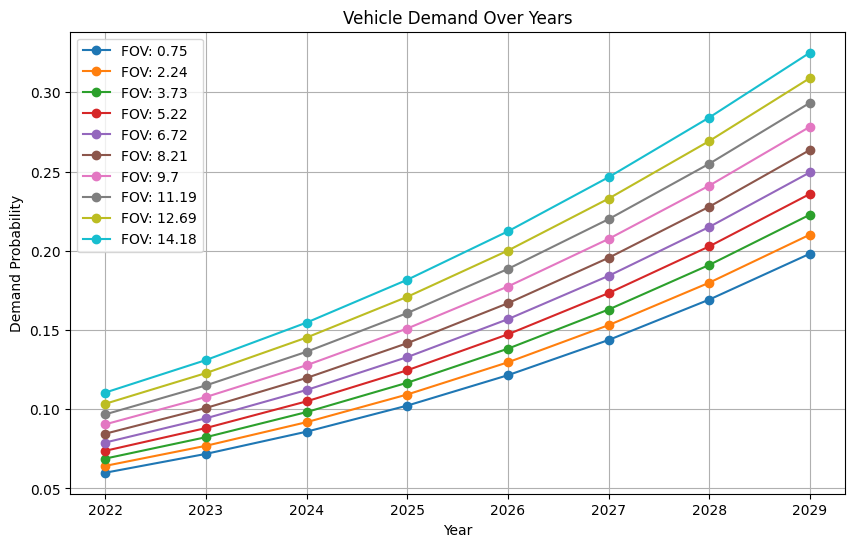

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

def calculate_fov(FullHorizontalFOV, FullVerticalFOV):
    """calculate a metric for the FOV of the HUD"""
    FoV = (FullHorizontalFOV * FullVerticalFOV * 100) / (67 * 20)
    return FoV

def calculate_weight_vehicle(volume, weight_vehicle_without_HUD):
    """calculate the weight of the vehicle"""
    weight_hud = 0.1 * volume  # kg
    weight_vehicle = weight_hud + weight_vehicle_without_HUD  # kg
    return weight_vehicle

def calculate_fuel_consumption(volume, weight_vehicle_without_HUD):
    """calculate the fuel consumption of the vehicle"""
    fuel_consumpt = calculate_weight_vehicle(
        volume, weight_vehicle_without_HUD
    ) * math.exp(
        -4.7
    )  # km / liter
    return fuel_consumpt

def calculate_demand(FullHorizontalFOV, FullVerticalFOV, volume, weight_vehicle_without_HUD, cost_fuel, person_height, price_vehicle, year):
    """calculate the demand of the vehicle"""
    Lin_no__1 = (
        400.389457364428
        + -0.0496637629531165 * (calculate_fov(FullHorizontalFOV, FullVerticalFOV))
        + 0.0438458326033747 * (calculate_fuel_consumption(volume, weight_vehicle_without_HUD))
        + 3.53646955685314 * (cost_fuel * 1000)
        + -0.0958055046356103 * (person_height)
        + 0.0000987106990985412 * (price_vehicle * 1000)
        + -0.193495221339535 * (year)
    )
    Prob_yes_1 = 1 / (1 + math.exp(Lin_no__1))  # demand
    return Prob_yes_1

# Range of years for plotting
years = np.arange(2022, 2030)

# Constant parameters for the other variables
FullHorizontalFOV = 20  # degrees
FullVerticalFOV = 10    # degrees
volume = 10               # liters
weight_vehicle_without_HUD = 1800  # kg
cost_fuel = 1.9/1000          # kEuros per liter
person_height = 180      # cm
price_vehicle = 35    # kEuros

# Plotting
plt.figure(figsize=(10, 6))
labels = []
for FullHorizontalFOV in [1]:
    for FullVerticalFOV in range(10,200,20):
        # Calculate demand for each year
        demands = [calculate_demand(FullHorizontalFOV, FullVerticalFOV, volume, weight_vehicle_without_HUD, cost_fuel, person_height, price_vehicle, year) for year in years]
        plt.plot(years, demands, marker='o')
        labels.append(f'FOV: {round(calculate_fov(FullHorizontalFOV,FullVerticalFOV),2)}')
plt.legend(labels)
plt.title('Vehicle Demand Over Years')
plt.xlabel('Year')
plt.ylabel('Demand Probability')
plt.grid(True)
plt.show()
